In [4]:
import matplotlib.pyplot as plt
import sys
import numpy
import os
import glob
import fnmatch
import pandas as pd
import neurokit2 as nk

numpy.set_printoptions(threshold=sys.maxsize)
plt.rcParams["figure.figsize"] = (25,20)

### Functions to get start time

In [92]:
import csv
from datetime import datetime, timedelta, timezone
import calendar


ecg_start_indexes = []




def convert_time(time_str):
    # Convert the string to a datetime object
    time_obj = datetime.strptime(time_str, '%I:%M:%S %p')
    # Convert the time to 24-hour format
    timestampo = timedelta(hours=time_obj.hour, minutes= time_obj.minute, seconds=time_obj.second)

    return timestampo

def get_time_from_line(line):
    # Extract mm:ss part from the line
    time_str = line.split('Start Time: ')[1].strip()
    time_str = convert_time(time_str)
    return time_str

def find_index_in_dataframe(text_file, dataframe, Hz):
    # Read the text file and extract the mm:ss time
    target_time = None
    with open(text_file, 'r') as file:
        lines = file.readlines()
        for line in lines:
            if line.startswith('Start Time: '):
                time = get_time_from_line(line)
                if time:
                    target_time = time
                    break

    if target_time:
        # Find the index of the row with the target time
        start_time = datetime.fromtimestamp(int(float(dataframe.columns[0])), tz= timezone.utc)
        start_time = timedelta(hours=start_time.hour ,minutes= start_time.minute, seconds=start_time.second)
        index = (target_time - start_time).seconds * Hz # 4 Hz

        if index:
            return index
        else:
            print("no index")
            return None
    else:
        print("no target time")
        return None

## EDA load and get start time

In [104]:
path = "./dataset/P*/E4/EDA.csv"
eda_all = []
for filename in glob.glob(path):
    eda_all.append(pd.read_csv(filename))

text_path = "./dataset/P*/VO2/Details.txt"
time_i_all = []
for i, filename in enumerate(glob.glob(text_path)):
    time_i_all.append(find_index_in_dataframe(filename, eda_all[i], 4))

print(time_i_all)

[264, 5012, 2932, 6604, 5464, 2924, 3208, 4784, 1908, 6560, 10716, 6940, 2404, 2484, 3724, 8792, 7516]


In [85]:
print([len(eda) for eda in eda_all])
print([len(eda) / 4 for eda in eda_all])

[9157, 15949, 14605, 15793, 13753, 11599, 12007, 12427, 9853, 14011, 19291, 17779, 10573, 11101, 13141, 18985, 16855]
[2289.25, 3987.25, 3651.25, 3948.25, 3438.25, 2899.75, 3001.75, 3106.75, 2463.25, 3502.75, 4822.75, 4444.75, 2643.25, 2775.25, 3285.25, 4746.25, 4213.75]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


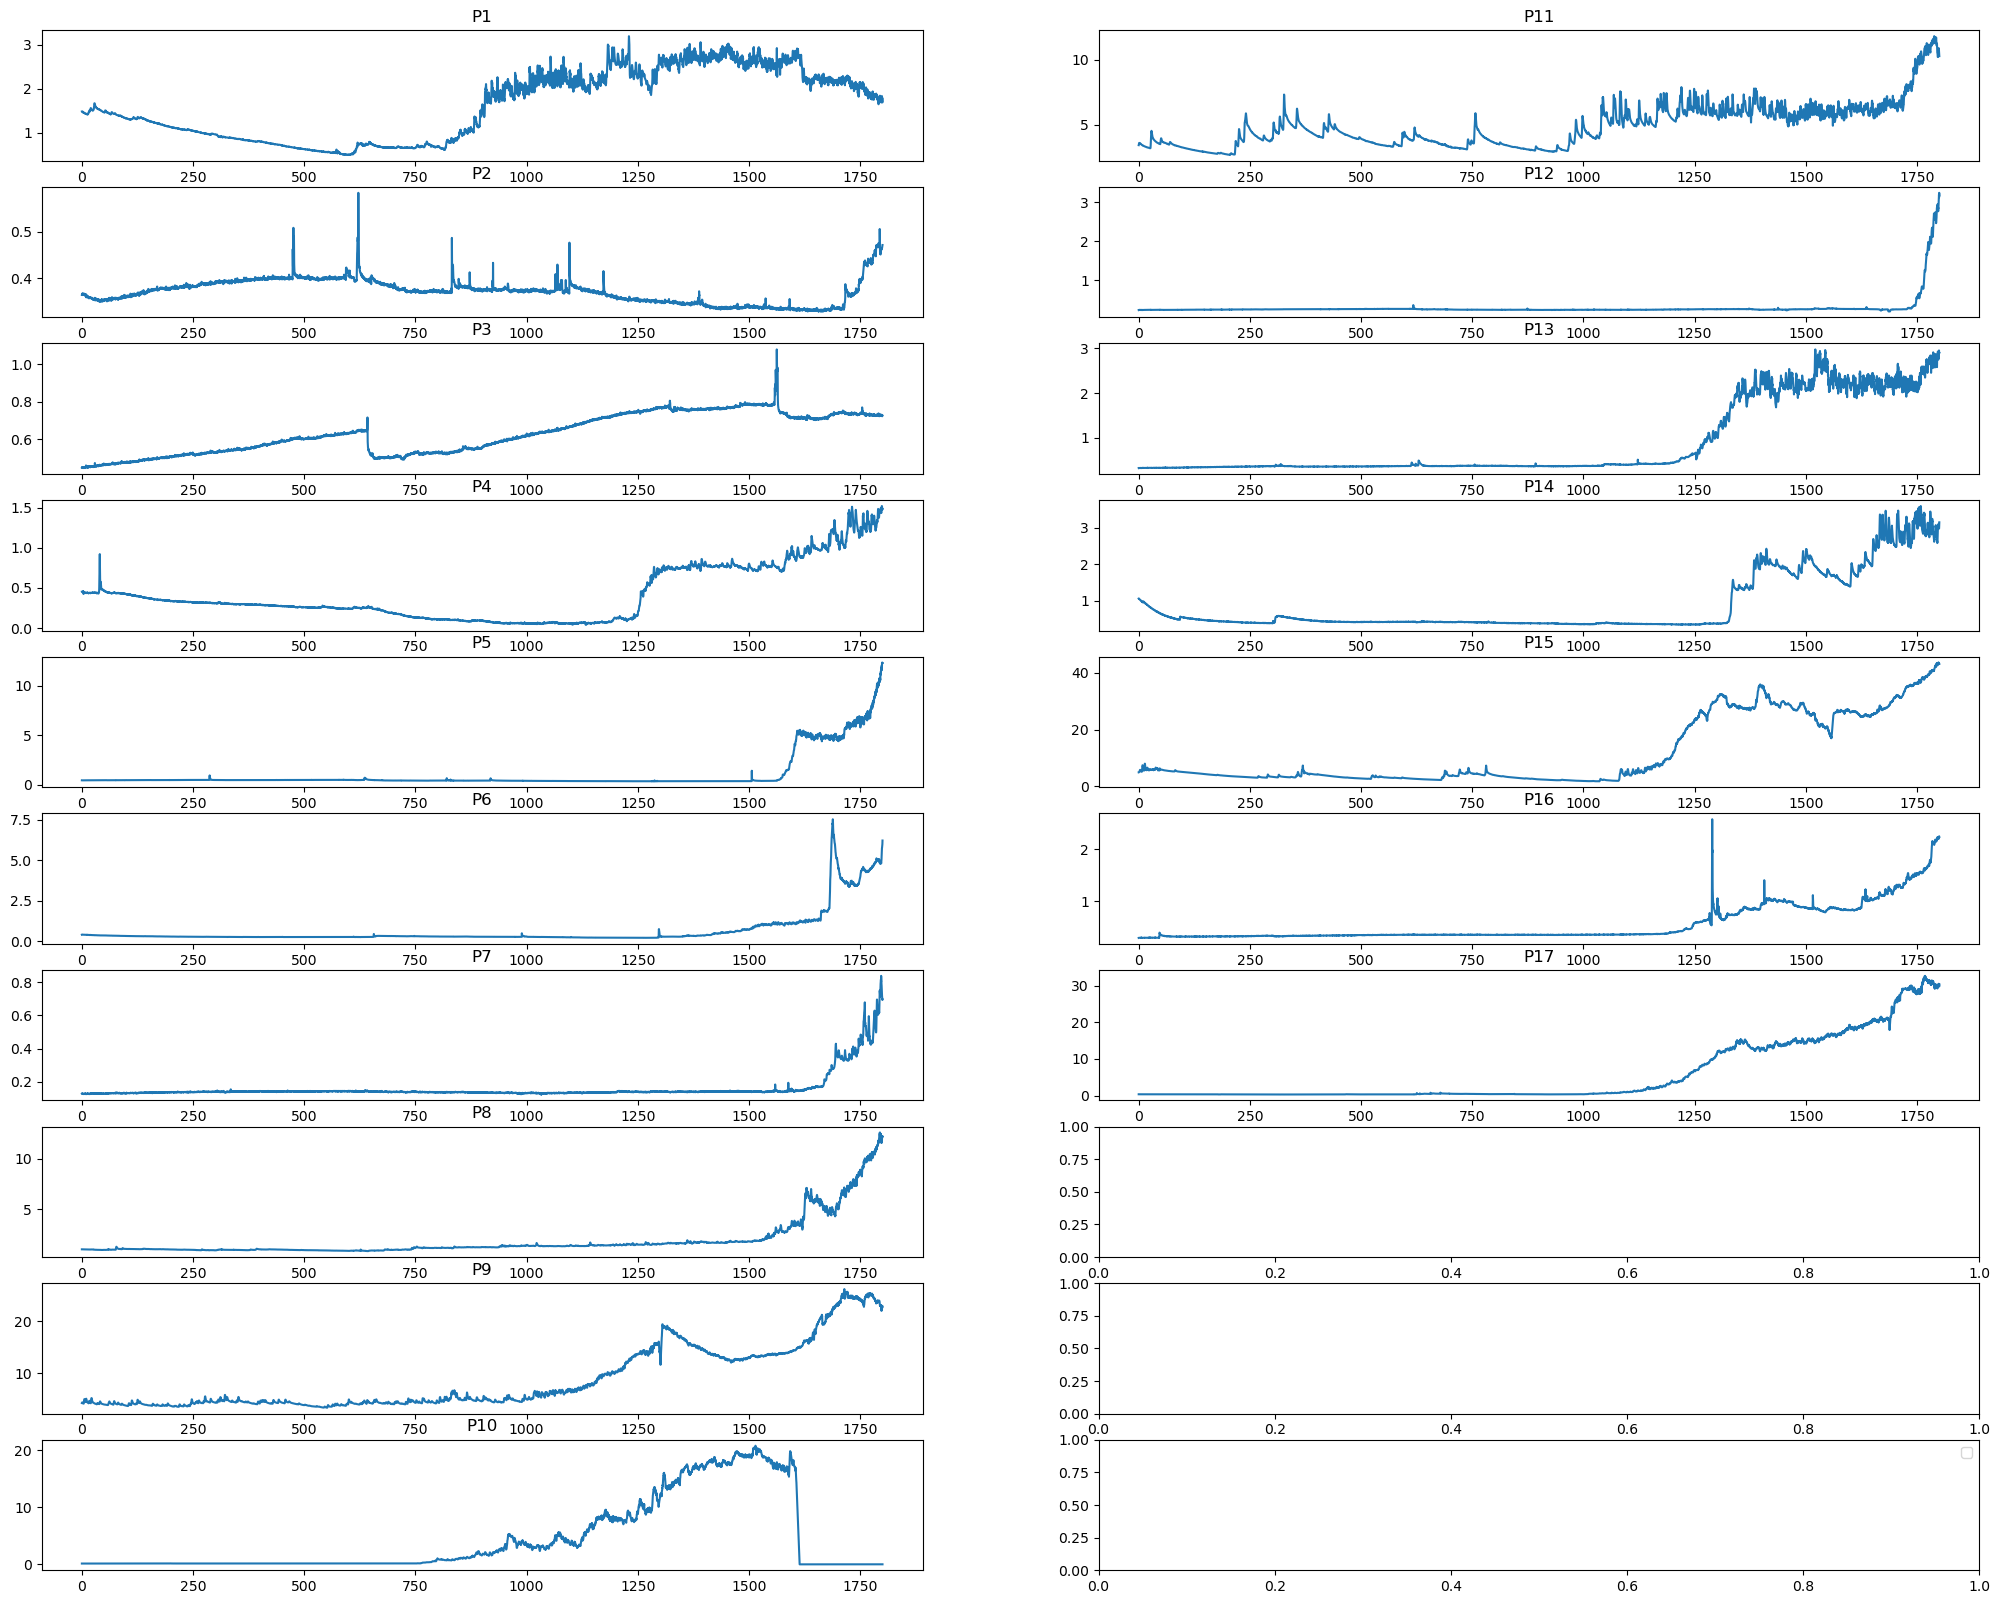

In [151]:
eda_signal = []
figure, axis = plt.subplots(10, 2) 
for i, eda_raw in enumerate(eda_all): # 7 and 14 prob
    total_sec = 1800
    sample_rate = 4
    start_index = time_i_all[i]
    end_index = start_index + (total_sec * sample_rate) #1800 * sample_rate) # 30 mins
    eda_signal = eda_raw.iloc[start_index:end_index, 0]
    # # eda_signal = nk.ecg_clean(eda_signal, sampling_rate=sample_rate, method='biosppy')
    # signals, info = nk.ecg_process(eda_signal, sampling_rate=sample_rate, method='neurokit') # (default): 0.5 Hz high-pass butterworth filter (order = 5), followed by powerline filtering (see signal_filter()). By default, powerline = 50

    # # Visualize
    # nk.ecg_plot(signals, info)
    # plt.plot(numpy.linspace(0, total_sec, total_sec * sample_rate), eda_signal)
    # axis[i if i < 10 else i - 10,0 if i < 10 else 1].plot(numpy.linspace(0, len(eda_signal) / 4, len(eda_signal)), eda_signal, label='original')
    axis[i if i < 10 else i - 10,0 if i < 10 else 1].plot(numpy.linspace(0, total_sec, total_sec * sample_rate), eda_signal, label='original')
    axis[i if i < 10 else i - 10,0 if i < 10 else 1].set_title('P' + str(i + 1))
    # axis[i].set_title('ecg ' + str(i))
plt.legend(loc='best')